In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, time, datetime
%matplotlib inline

In [62]:
train_labels = pd.read_csv('train_labels.csv')
train_labels.shape

(260601, 2)

In [63]:
train_values = pd.read_csv('train_values.csv', usecols=['building_id', 
                                                        'has_superstructure_adobe_mud', 
                                                        'has_superstructure_mud_mortar_stone', 
                                                        'has_superstructure_stone_flag',
                                                        'has_superstructure_cement_mortar_stone',
                                                        'has_superstructure_mud_mortar_brick',
                                                        'has_superstructure_cement_mortar_brick',
                                                        'has_superstructure_timber',
                                                        'has_superstructure_bamboo', 
                                                        'has_superstructure_other'])
train_values.shape

(260601, 10)

In [64]:
labels_and_values = train_labels.merge(train_values, how='inner')
labels_and_values

,building_id,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_other
0,802906,3,1,1,0,0,0,0,0,0,0
1,28830,2,0,1,0,0,0,0,0,0,0
2,94947,3,0,1,0,0,0,0,0,0,0
3,590882,2,0,1,0,0,0,0,1,1,0
4,201944,3,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,0,1,0,0,0,0,0,0,0
260597,669485,3,0,1,0,0,0,0,0,0,0
260598,602512,3,0,1,0,0,0,0,0,0,0
260599,151409,2,0,0,0,0,0,1,0,0,0


In [65]:
por_daño = labels_and_values.groupby('damage_grade')\
                            .agg({'has_superstructure_adobe_mud':'sum', 
                                  'has_superstructure_mud_mortar_stone':'sum', 
                                  'has_superstructure_stone_flag':'sum',
                                  'has_superstructure_cement_mortar_stone':'sum',
                                  'has_superstructure_mud_mortar_brick':'sum',
                                  'has_superstructure_cement_mortar_brick':'sum',
                                  'has_superstructure_timber':'sum',
                                  'has_superstructure_bamboo':'sum', 
                                  'has_superstructure_other':'sum'})
por_daño = por_daño.T
por_daño.index = ['adobe_mud',
                    'mud_mortar_stone', 
                    'stone_flag',
                    'cement_mortar_stone',
                    'mud_mortar_brick',
                    'cement_mortar_brick',
                    'timber',
                    'bamboo', 
                    'other']
por_daño

damage_grade,1,2,3
adobe_mud,594,13902,8605
mud_mortar_stone,8760,113947,75854
stone_flag,182,4534,4231
cement_mortar_stone,829,3248,675
mud_mortar_brick,623,11698,5440
cement_mortar_brick,7105,11421,1089
timber,7642,40187,18621
bamboo,2839,14001,5314
other,656,2248,1001


In [66]:
por_daño['buildings_por_material'] = por_daño[1] + por_daño[2] + por_daño[3]
por_daño

damage_grade,1,2,3,buildings_por_material
adobe_mud,594,13902,8605,23101
mud_mortar_stone,8760,113947,75854,198561
stone_flag,182,4534,4231,8947
cement_mortar_stone,829,3248,675,4752
mud_mortar_brick,623,11698,5440,17761
cement_mortar_brick,7105,11421,1089,19615
timber,7642,40187,18621,66450
bamboo,2839,14001,5314,22154
other,656,2248,1001,3905


Text(0, 0.5, 'Material')

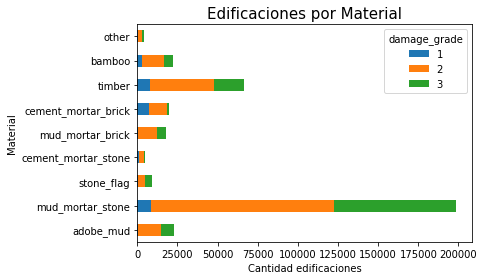

In [76]:
por_daño[[1, 2, 3]].plot(kind="barh", stacked=True)
plt.title("Edificaciones por Material", fontsize=15)
plt.xlabel("Cantidad edificaciones")
plt.ylabel("Material")

In [68]:
por_daño['efectividad'] = por_daño[1]/por_daño['buildings_por_material']
por_daño

damage_grade,1,2,3,buildings_por_material,efectividad
adobe_mud,594,13902,8605,23101,0.025713
mud_mortar_stone,8760,113947,75854,198561,0.044117
stone_flag,182,4534,4231,8947,0.020342
cement_mortar_stone,829,3248,675,4752,0.174453
mud_mortar_brick,623,11698,5440,17761,0.035077
cement_mortar_brick,7105,11421,1089,19615,0.362223
timber,7642,40187,18621,66450,0.115004
bamboo,2839,14001,5314,22154,0.128148
other,656,2248,1001,3905,0.167990


In [69]:
por_daño['deficiencia'] = por_daño[3]/por_daño['buildings_por_material']
por_daño

damage_grade,1,2,3,buildings_por_material,efectividad,deficiencia
adobe_mud,594,13902,8605,23101,0.025713,0.372495
mud_mortar_stone,8760,113947,75854,198561,0.044117,0.382019
stone_flag,182,4534,4231,8947,0.020342,0.472896
cement_mortar_stone,829,3248,675,4752,0.174453,0.142045
mud_mortar_brick,623,11698,5440,17761,0.035077,0.306289
cement_mortar_brick,7105,11421,1089,19615,0.362223,0.055519
timber,7642,40187,18621,66450,0.115004,0.280226
bamboo,2839,14001,5314,22154,0.128148,0.239866
other,656,2248,1001,3905,0.167990,0.256338


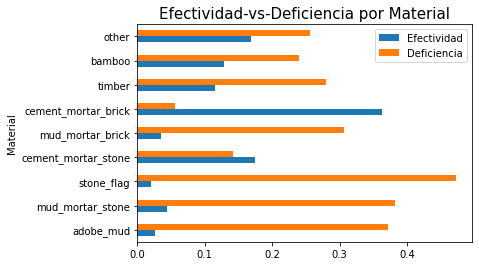

In [77]:
por_daño[['efectividad', 'deficiencia']].plot(kind="barh")
plt.title("Efectividad-vs-Deficiencia por Material", fontsize=15)
plt.ylabel("Material")
plt.legend(["Efectividad", "Deficiencia"])